# Data Preprocessing

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [2]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"
df = pd.read_csv(url)
df.head()

,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [3]:
# get info from dataset 
# there are no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [4]:
# get statistical info from dataset
df.describe()

,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


In [5]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [6]:
# Drop Employee_ID as it's only an identifier.

df = df.drop(columns=['Employee_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

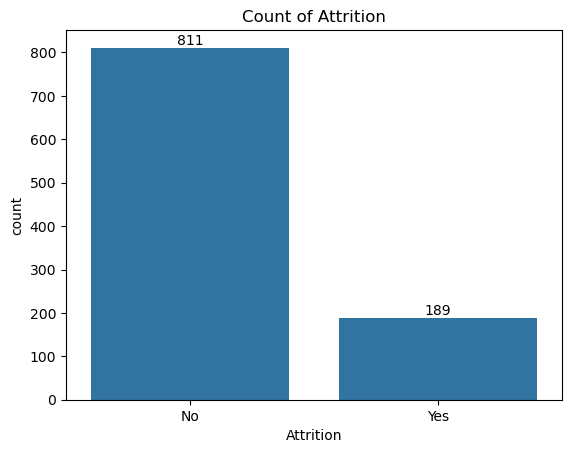

In [7]:
# show how many attrition
ax = sns.countplot(data=df, x='Attrition')
plt.title('Count of Attrition')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# We can see that this is imbalance dataset 

# Feature Encoding

In [8]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, Overtime
one_hot_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

# There's no ordinal columns that need encoding so no need ordinal encoding 
# move on to nominal encoding

# 2. Nominal Encoding
nominal_cols = ['Department', 'Job_Role', 'Marital_Status']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)


{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
589,29,1,2.0,3.0,0.0,5,3615,62,26,8,6,3,3,4,89,0,6,59,2,2,3,1,28,2,0
142,47,1,0.0,3.0,0.0,5,4466,68,25,4,6,1,2,4,39,1,6,42,11,2,4,4,41,2,0
96,27,0,2.0,2.0,1.0,2,5076,85,6,13,7,1,1,4,90,0,7,59,6,4,1,2,21,3,0
693,46,1,1.0,3.0,2.0,5,8583,67,10,4,5,1,5,3,93,0,7,56,17,1,2,3,37,3,0
818,22,1,2.0,0.0,0.0,4,15886,42,14,5,0,2,1,4,96,0,8,58,13,1,3,2,16,4,0


In [9]:
# checking encode result, check salah satu row random utk cocokkan dictionary dengan data asli
df.loc[841]

#sudah betul

Age                                    25
Gender                             Female
Marital_Status                   Divorced
Department                             HR
Job_Role                          Manager
Job_Level                               3
Monthly_Income                      13313
Hourly_Rate                            41
Years_at_Company                       11
Years_in_Current_Role                   1
Years_Since_Last_Promotion              0
Work_Life_Balance                       1
Job_Satisfaction                        2
Performance_Rating                      3
Training_Hours_Last_Year               38
Overtime                               No
Project_Count                           5
Average_Hours_Worked_Per_Week          36
Absenteeism                             4
Work_Environment_Satisfaction           2
Relationship_with_Manager               4
Job_Involvement                         4
Distance_From_Home                     20
Number_of_Companies_Worked        

# Separate Features and Target

In [10]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

In [11]:
# Without attrition column
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [12]:
# Just attrition column
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

# Split Data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
X_train.shape, X_test.shape

((700, 24), (300, 24))

In [15]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
105,41,0,1.0,3.0,1.0,2,6144,65,21,9,7,2,3,2,14,0,8,40,13,1,1,4,34,2
68,59,0,2.0,4.0,2.0,3,3935,24,7,7,2,2,2,1,39,0,7,55,12,3,2,4,19,2
479,56,0,1.0,4.0,3.0,1,15478,99,17,8,8,4,3,2,35,0,3,43,6,2,4,4,5,2
399,49,1,1.0,1.0,3.0,4,9040,35,29,10,7,1,4,1,16,1,9,51,17,4,3,4,45,1
434,52,0,2.0,3.0,0.0,1,11219,96,21,5,0,3,5,1,57,0,3,51,10,2,4,3,45,3


In [16]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
993,24,1,0.0,0.0,3.0,2,16465,32,10,10,2,4,2,4,6,1,7,51,18,2,2,3,8,4
859,25,0,0.0,1.0,0.0,5,18871,51,16,10,8,4,1,1,4,0,3,44,4,1,4,4,19,3
298,43,1,1.0,0.0,2.0,4,11226,81,26,1,2,2,4,4,34,1,6,47,7,2,3,2,32,1
553,58,0,0.0,4.0,1.0,3,18859,58,8,1,3,1,3,4,89,0,8,46,3,2,2,3,17,3
672,31,0,2.0,4.0,3.0,3,10509,19,23,1,4,3,1,3,79,0,7,48,7,4,1,4,36,1


# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       245
           1       0.17      0.25      0.21        55

    accuracy                           0.64       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.70      0.64      0.66       300



The F1 Score of testing set for column 1 ("Yes") is very bad. Because most of the attrition data in the dataset is 0 ("No"). 
Accuracy only 64%, this shows overfitting, because our training dataset performed well but our testing dataset perform bad. So need to do oversampling to handle the imbalance dataset.

# Oversampling using SMOTENC

In [18]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Role',
    'Job_Level',
    'Work_Life_Balance',
    'Job_Satisfaction',
    'Performance_Rating',
    'Work_Environment_Satisfaction',
    'Relationship_with_Manager',
    'Job_Involvement',
    'Overtime'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 24), (487, 24))

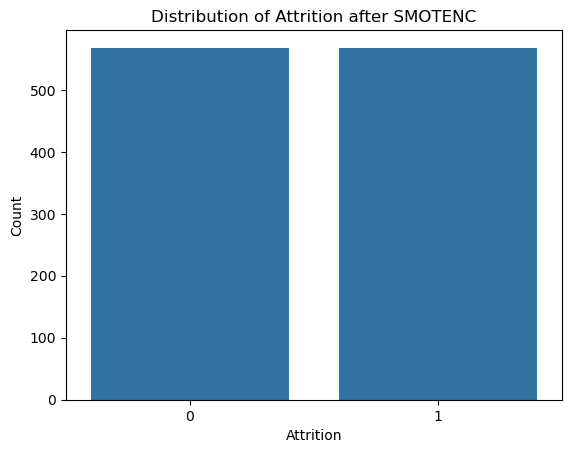

In [19]:
#hanya coba nampilin y_train, kenapa 500? karena oversampling

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

In [21]:
# BUILD CLASSIFICATION MODEL but with no parameters (criterion ="gini", max depth dll gapake)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.73      0.58      0.64       244
           1       0.65      0.78      0.71       243

    accuracy                           0.68       487
   macro avg       0.69      0.68      0.68       487
weighted avg       0.69      0.68      0.68       487



Performance is much better after oversampling for test set of column 1 where the F1-score is 71% now. but column 0 drops to 66%. But accuracy improved just a little bit, which is 69%. So we still need to improve overfitting and see realistic F1 score using K-Fold.

# KFold Cross Validation

In [22]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 1297, Test set:325
Fold:2, Train set: 1297, Test set:325
Fold:3, Train set: 1298, Test set:324
Fold:4, Train set: 1298, Test set:324
Fold:5, Train set: 1298, Test set:324


In [23]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.67484663 0.74029851 0.72491909 0.69295775 0.71505376]
Average score: 0.71


In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
Best cross-validation f1 score: 0.716


K Fold shows that realistically, our model performs with an F1 Score of 69.2%, which is a little bit worse than before K-Fold which is 71%. But we can use the best parameter for later.

# Feature Importance

In [25]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.04023167 0.         0.01652651 0.01165933 0.02024496 0.02387269
 0.09139844 0.05977922 0.07246931 0.06436657 0.0811711  0.01432768
 0.02574656 0.04073476 0.06829858 0.0135599  0.05918355 0.07119103
 0.05797356 0.02847648 0.01435913 0.02092232 0.05881487 0.04469176]


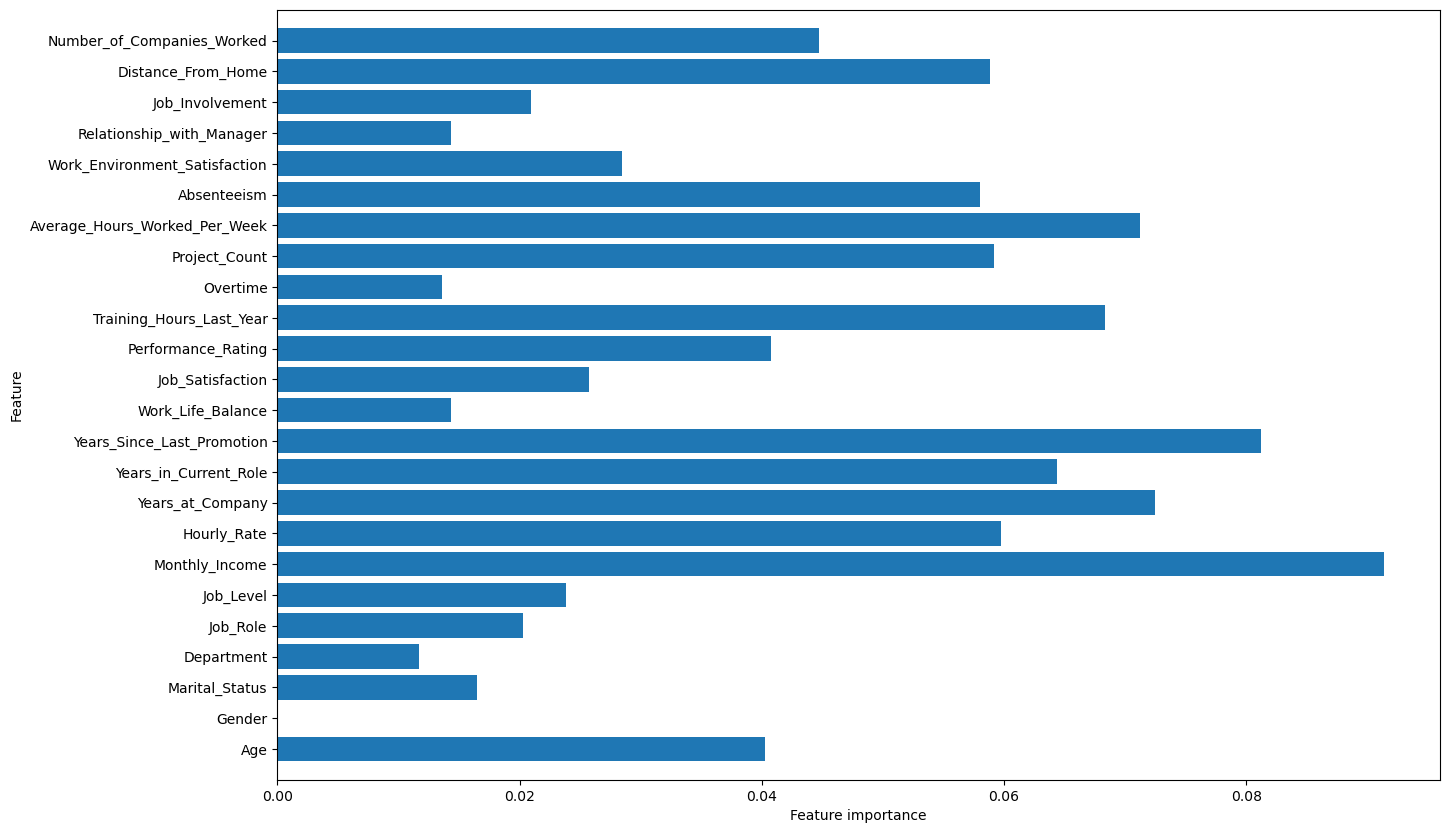

In [26]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

Semakin tinggi importancenya, maka itu yg hrs dipilih

In [27]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

Monthly_Income                   0.091398
Years_Since_Last_Promotion       0.081171
Years_at_Company                 0.072469
Average_Hours_Worked_Per_Week    0.071191
Training_Hours_Last_Year         0.068299
Years_in_Current_Role            0.064367
Hourly_Rate                      0.059779
Project_Count                    0.059184
Distance_From_Home               0.058815
Absenteeism                      0.057974
dtype: float64

In [28]:
# using only important features for the prediction
important_features = ["Monthly_Income", "Training_Hours_Last_Year", "Years_Since_Last_Promotion",
    "Years_in_Current_Role", "Hourly_Rate", "Years_at_Company", "Distance_From_Home", "Average_Hours_Worked_Per_Week", "Absenteeism"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['Attrition'] #target

In [29]:
display(X_importance)
display(y_importance)

,Monthly_Income,Training_Hours_Last_Year,Years_Since_Last_Promotion,Years_in_Current_Role,Hourly_Rate,Years_at_Company,Distance_From_Home,Average_Hours_Worked_Per_Week,Absenteeism
0,15488,14,2,4,28,15,20,54,17
1,13079,6,1,9,28,6,25,45,1
2,13744,77,8,14,24,24,45,34,2
3,6809,49,2,8,26,10,35,48,18
4,10206,64,1,10,52,29,44,33,0
...,...,...,...,...,...,...,...,...,...
995,4172,76,3,14,76,24,24,46,10
996,11007,53,0,6,71,19,39,36,16
997,4641,7,3,12,43,25,33,46,9
998,19855,54,0,13,92,13,41,52,17


0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    0
998    0
999    0
Name: Attrition, Length: 1000, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# no categorical data, so use SMOTE
smote = SMOTE(random_state=42)
X_importance, y_importance = smote.fit_resample(X_importance, y_importance)

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X_importance, y_importance, test_size=0.3, random_state=0
)

# === Check shapes ===
print(X_train.shape, X_test.shape)

(1135, 9) (487, 9)


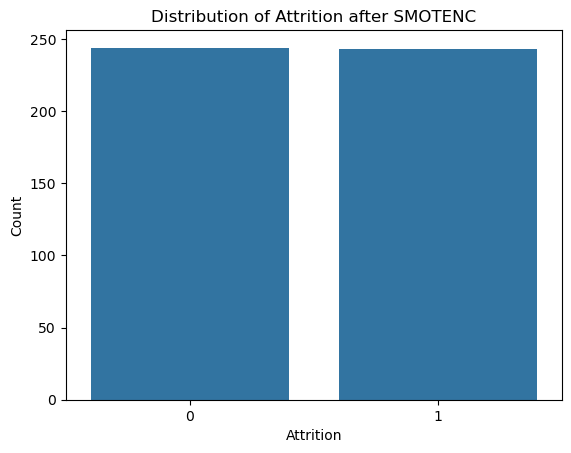

In [31]:
# just to visualize the distribution of target class after SMOTE

sns.countplot(x=y_test)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [32]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       579

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       255
           1       0.72      0.72      0.72       232

    accuracy                           0.74       487
   macro avg       0.73      0.73      0.73       487
weighted avg       0.74      0.74      0.74       487



The F1-score improved quite good which is 72% for column 1 and 75% for column 0, and the accuracy is much better, which is 74%. So I'll use just those columns for my model. Next try to select predictor or X features based on correlation.

# Selecting Predictors/Features Based on Correlation

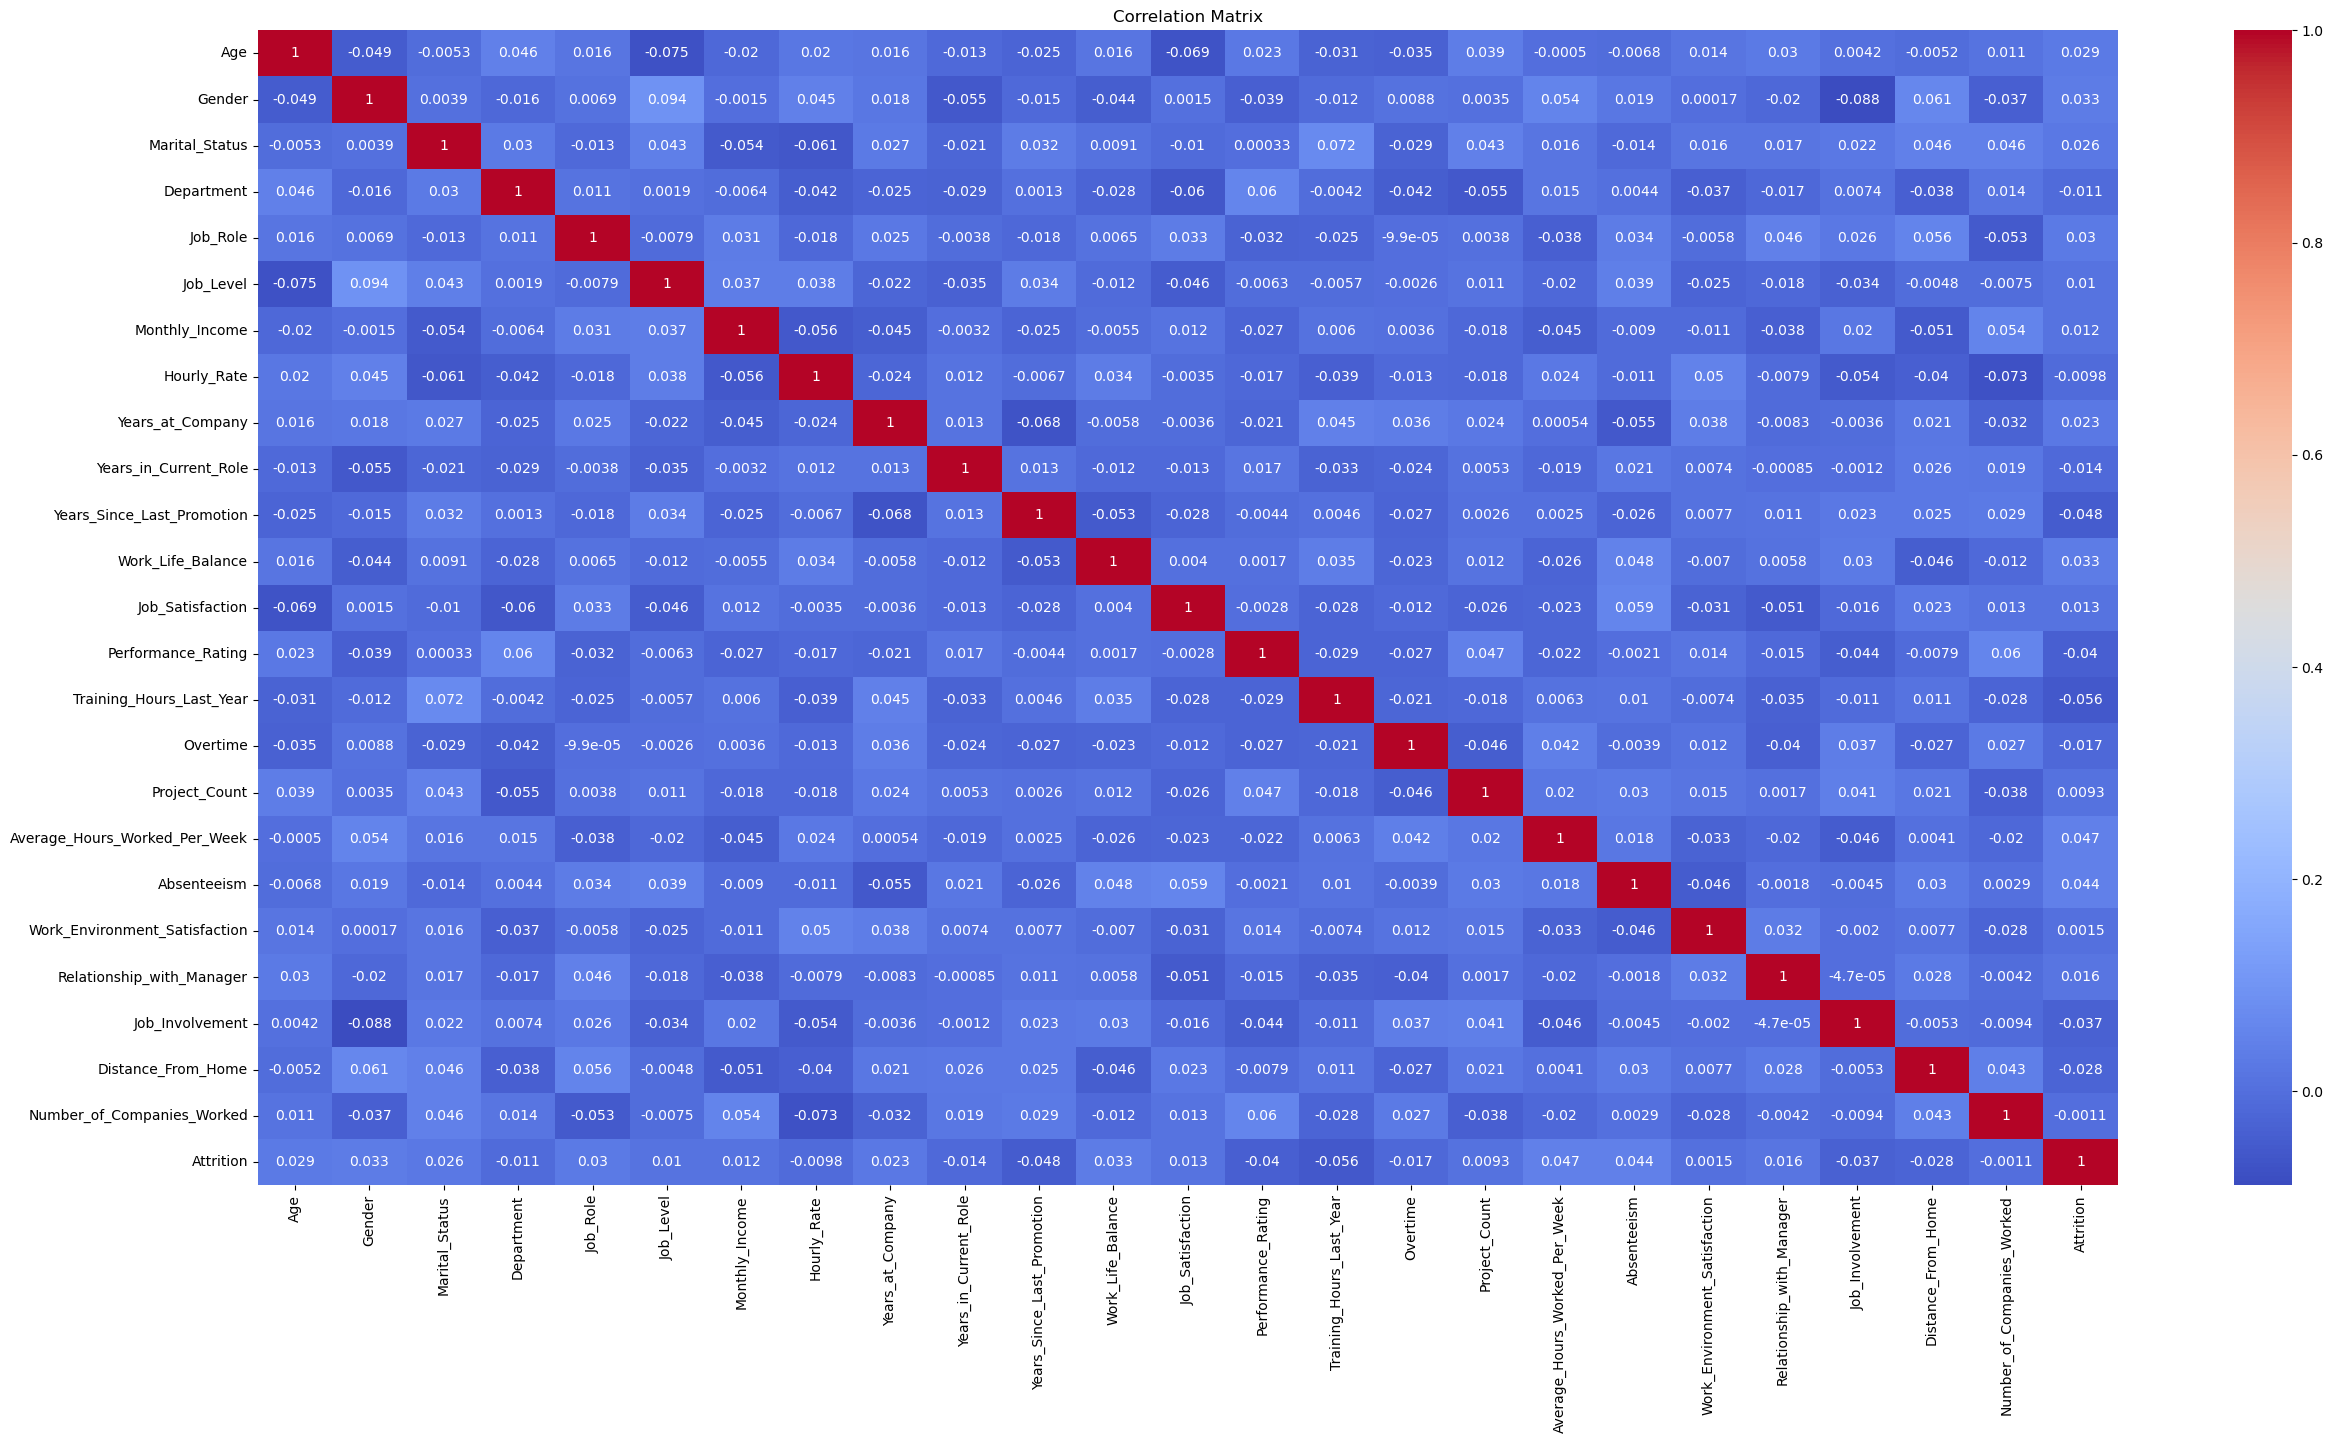

In [33]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# I only choose some highest correlation and if there are two predictors have high correlation, i will only choose one with higher correlation

heatmap_features = ['Years_at_Company', 'Monthly_Income', 'Job_Level', 'Years_Since_Last_Promotion', 'Job_Satisfaction']
X_heatmap = df_encoded[heatmap_features] #input
y_heatmap = df_encoded['Attrition'] #target

In [ ]:
# dont forget to define the categorical features ok
categorical_features = ["Job_Level", "Job_Satisfaction"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_heatmap, y_heatmap = smotenc.fit_resample(X_heatmap, y_heatmap)

X_train, X_test, y_train, y_test = train_test_split(X_heatmap, y_heatmap, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1135, 5), (487, 5))

In [36]:
# i build a model based on best feature by correlation
heatmap_tree = DecisionTreeClassifier()
heatmap_tree.fit(X_train, y_train)

y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       244
           1       0.67      0.75      0.71       243

    accuracy                           0.69       487
   macro avg       0.69      0.69      0.69       487
weighted avg       0.69      0.69      0.69       487



The result of F1-score and accuracy doenst improve much. So I'm just gonna use the feature importance and hyperpramater tuning using grid search

# FINAL MODEL

Use Features Importance

In [37]:
important_features = [
    "Monthly_Income", "Training_Hours_Last_Year", "Years_Since_Last_Promotion",
    "Years_in_Current_Role", "Hourly_Rate", "Years_at_Company",
    "Distance_From_Home", "Average_Hours_Worked_Per_Week", "Absenteeism"
]
X_importance = df_encoded[important_features]  # input
y_importance = df_encoded['Attrition']         # target

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

Hyperparameter Tuning using Grid Search

In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}
Best cross-validation f1 score: 0.746


We can see that the best parameters for our model is {'criterion': 'entropy', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}.

We can apply that in our model

In [39]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       556
           1       0.95      0.99      0.97       579

    accuracy                           0.97      1135
   macro avg       0.97      0.97      0.97      1135
weighted avg       0.97      0.97      0.97      1135


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       255
           1       0.70      0.78      0.74       232

    accuracy                           0.73       487
   macro avg       0.74      0.74      0.73       487
weighted avg       0.74      0.73      0.73       487



After using the most important features and kfold with hyperparameter tuning, the model achieved a realistic F1 Score of around 0.73 on the test set.

This shows that the model performs well on unseen data, though lower than the training F1 Score because of overfitting. But overall, using feature selection and K-Fold helped create a more reliable and generalizable model for predicting employee attrition. 

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       566
           1       1.00      1.00      1.00       134

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       245
           1       0.17      0.25      0.21        55

    accuracy                           0.64       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.70      0.64      0.66       300

Here we can compare the result before oversampling and model development, where the F1 score and accuracy was very bad cause of overfitting and imbalance data. But after using oversampling, removing unnecessary columns with features importance, and finding out the best parameter to tune our model, we achieved a much more realistic model with a better F1 Score, precision and accuracy result.